# conditional logit
- Import Module
- read csv file

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import backtest as bt
from matplotlib import pyplot as plt

predictcsv = "clogit_choice3.csv"
df = pd.read_csv(predictcsv, index_col = 0, encoding='utf-8')
# print(df.columns)

### 데이터 전처리
- 빠른 연산을 위해 필요한 column만 선택
- 결측치가 많은 게임은 제외
- 게임별로 group을 나눔

In [2]:
col_list = ['rank','phat','dandivi','yeondivi','groupid','location']
groupid = 'groupid'
data, gb_data, total_data = bt.getData(df, col_list, groupid, min_size=10)

## 단승식 정액 베팅
- phat이 특정 값 이상일 때만 베팅
- minimum phat을 0, 0.15, 0.2, 0.25으로 설정
- 까다롭게 설정할수록 맞출 확률이 높다

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
phat의 최솟값: 0
베팅한 게임: 1000
예측 성공한 게임: 334
최종 금액: 354000.0


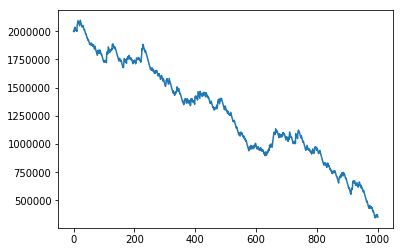

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
phat의 최솟값: 0.15
베팅한 게임: 979
예측 성공한 게임: 329
최종 금액: 365000.0


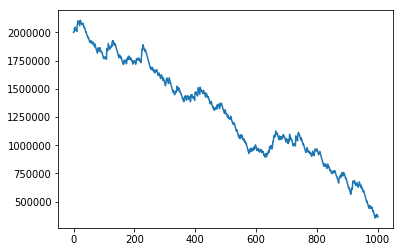

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
phat의 최솟값: 0.2
베팅한 게임: 518
예측 성공한 게임: 214
최종 금액: 1209000.0


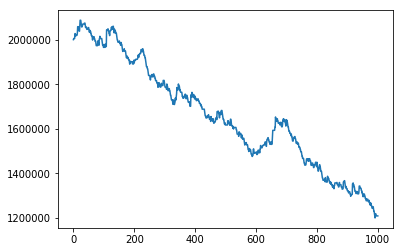

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
phat의 최솟값: 0.25
베팅한 게임: 123
예측 성공한 게임: 69
최종 금액: 1926000.0


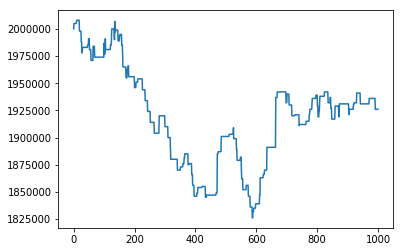

In [3]:
betting_money = 10000
start_money = 2000000
min_phat_list = [0, 0.15, 0.2, 0.25]
plt.figure(1)
for m in min_phat_list:
    ongoing, cnt, get, moneylist = bt.dan_bet(betting_money, start_money,total_data,\
                                            'phat',min_pred=m)
    print('파일 크기:',len(data))
    print('전체 게임:',len(gb_data))
    print('테스트 게임:',len(total_data))
    print('phat의 최솟값:', m)
    print('베팅한 게임:',cnt)
    print('예측 성공한 게임:',get)
    print('최종 금액:',moneylist[-1])
    
    %matplotlib inline
    plt.plot(moneylist)
    plt.show()


## 연승식 정액 베팅
- phat이 특정 값 이상일 때만 베팅
- minimum phat을 0, 0.15, 0.2, 0.25으로 설정
- 까다롭게 설정할수록 맞출 확률이 높다
- 켈리베팅을 위해 minimum phat별 정답률 측정!

---
1. phat 0.0 ~ 0.15 : 47.6% : 21개  중 10개
2. phat 0.15 ~ 0.2 : 55.9% : 460개 중 257개
3. phat 0.2 ~ 0.25 : 70.1% : 391개 중 274개 
4. phat 0.25 ~ 1.0 : 81.3% : 123개 중 100개 

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 게임: 995
예측 성공한 게임: 641
최종 금액: 599000.0


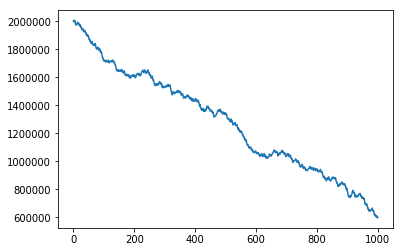

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 게임: 974
예측 성공한 게임: 631
최종 금액: 632000.0


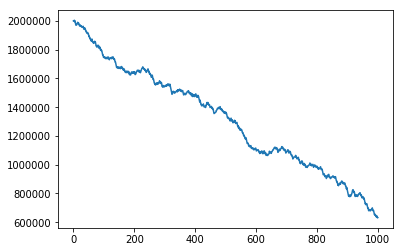

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 게임: 514
예측 성공한 게임: 374
최종 금액: 1395000.0


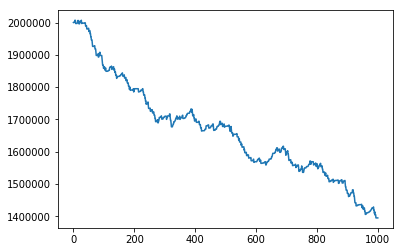

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 게임: 123
예측 성공한 게임: 100
최종 금액: 1871000.0


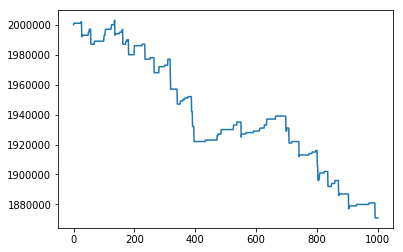

In [4]:
for m in min_phat_list:
    ongoing, cnt, get, moneylist = bt.yeon_bet(betting_money, start_money,total_data,\
                                             'phat',min_pred=m)

    print('파일 크기:',len(data))
    print('전체 게임:',len(gb_data))
    print('테스트 게임:',len(total_data))
    print('베팅한 게임:',cnt)
    print('예측 성공한 게임:',get)
    print('최종 금액:',moneylist[-1])

    %matplotlib inline
    from matplotlib import pyplot as plt
    plt.plot(moneylist)
    plt.show()


## 켈리 베팅 단승
- 배당률이 높고, 정보 우위가 확실할 때 베팅!
- 유일하게 돈을 딴다

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 게임: 70
예측 성공한 게임: 11
최종 금액: 3822575.032827637


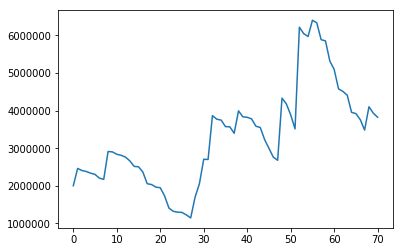

In [5]:
ongoing, cnt, get, moneylist = bt.kelly_dan_bet(betting_money, start_money,total_data,\
                                            'phat',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()


## 켈리 베팅 단승 
- phat 상위 3개 말 모두 betting 가능성 열어둔다.
- 결과적으로 초반에 큰 손실로 인해 돈을 못 딴다.

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 횟수: 845
예측 성공한 횟수: 76
최종 금액: 11.600205212483615


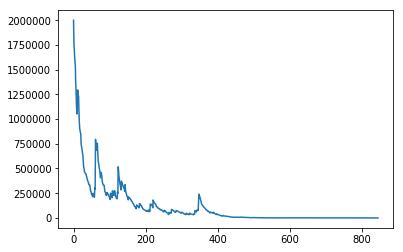

In [6]:
ongoing, cnt, get, moneylist = bt.kelly_dan3_bet(betting_money, start_money,total_data,\
                                            'phat',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 횟수:',cnt)
print('예측 성공한 횟수:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()

## 켈리 베팅 연승
- 연승의 정답율을 구하기 귀찮다.

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 게임: 0
예측 성공한 게임: 0
최종 금액: 2000000


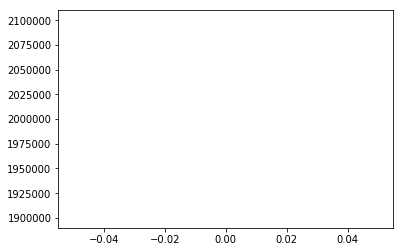

In [7]:
ongoing, cnt, get, moneylist = bt.kelly_yeon_bet(betting_money, start_money,total_data,\
                                            'phat',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()


## 켈리 베팅 연승
- phat 상위 3개 말 모두 check
- 연승 배당율이 너무 낮아서 베팅을 하지 않는다.

파일 크기: 14880
전체 게임: 1441
테스트 게임: 1000
베팅한 횟수: 0
예측 성공한 횟수: 0
최종 금액: 2000000


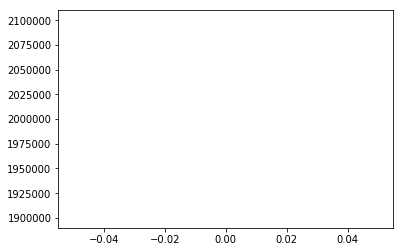

In [8]:
ongoing, cnt, get, moneylist = bt.kelly_yeon3_bet(betting_money, start_money,total_data,\
                                            'phat',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 횟수:',cnt)
print('예측 성공한 횟수:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()
